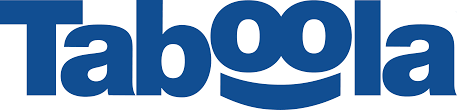

# Taboola CTR Value-For-Money Prediction
---

> Catboost, xgboost basline

> some fully connected network

In [1]:
from collections import Counter
import pandas as pd
import logging
import os
import numpy as np
import scipy.sparse
import xgboost as xgb

## Data

In [2]:
import sys
sys.path.append("/home/ec2-user/SageMaker/recsys-bgu")

In [3]:
train_path = "./raw_data/part-00002.csv"
train_data = pd.read_csv(train_path)
train_data = train_data.fillna(0)

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_data.drop('is_click',axis=1), train_data.is_click, test_size=0.25, random_state=42)

In [7]:
from kaggle.preprocess.ohe_features import OHEFeaturesProcessor

features_processor = OHEFeaturesProcessor()
features_processor.fit(X_train)
len(features_processor.features_names)

854

In [10]:
X_train_ = features_processor.transform(X_train)
X_test_ = features_processor.transform(X_test)
print(X_train_.shape, X_test_.shape)

(4757, 258) (1586, 258)


In [ ]:
test = scipy.sparse.load_npz('./processed_data/test_data.npz')

In [ ]:
train.shape, test.shape

# Xgboost

In [21]:
model = xgb.XGBClassifier(n_estimators= 400, max_depth=8)

In [22]:
model.fit(X_train_, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [23]:
predictions = model.predict(X_test_)
predictions[:5]

array([1., 0., 1., 1., 1.])

# AUC

In [24]:
from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)

In [25]:
roc_auc

0.7379581255914184